In [ ]:
#pip install mat73 #(to read matlab v7.3 .mat)
#pip install nose

__Here some scripts adapted from https://github.com/kingjr/decod_unseen_maintenance to perform circular correlation in orientation data__

In [5]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import mat73
import matplotlib.pyplot as plt

In [6]:
import sys
path_utils = '/Users/alex/Library/CloudStorage/OneDrive-UniversitatdeBarcelona/TOOLBOXES/decoding_toolbox_py/helper_funcs' 
sys.path.append(path_utils)

In [7]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np

from mne import read_epochs
from mne.decoding import SlidingEstimator,GeneralizingEstimator

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVR
from base_stats import corr_linear_circular

#from jr.gat import subscore
#from jr.gat import AngularRegression, scorer_angle
#from jr.stats import corr_linear_circular
#from jr.plot import pretty_gat, pretty_decod

In [8]:
path = '/Users/alex/Library/CloudStorage/OneDrive-UniversitatdeBarcelona/TOOLBOXES/decoding-toolbox/data/'
path_ori_data = path + 'testdata_orientation.mat'
ori_data = mat73.loadmat(path_ori_data)

In [10]:
Y = ori_data['X']
Y = np.deg2rad(Y * (180/8))
X = ori_data['Y']
# reordering
X = np.einsum('kji->ikj', X)

In [11]:
n_trial, n_chan, n_time = X.shape
Xreshape = X.reshape([-1, n_chan * n_time])


UNIVARIATE CIRCULAR CORRELATION (activity from independent channels)

In [12]:

# linear circular correlation between MEG and stim angle
_, R2, _ = corr_linear_circular(Xreshape, Y)

# plot the effect size using MNE
R2 = R2.reshape([n_chan, n_time])

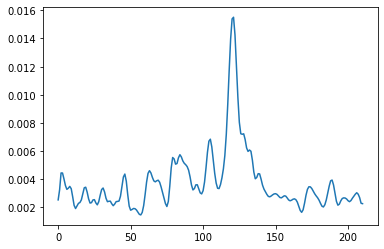

In [13]:
plt.plot(np.squeeze(np.mean(R2,0)))

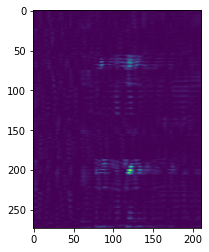

In [14]:
plt.imshow(R2)

In [26]:
def circdist(angles1,angles2):       
    return np.angle(np.exp(1j*angles1)/np.exp(1j*angles2))

In [15]:
from classifier_funcs import AngularRegression, scorer_angle


In [16]:
clf_angle = make_pipeline(StandardScaler(), AngularRegression(clf=LinearSVR()))
td = SlidingEstimator( clf_angle, scoring=scorer_angle)

In [17]:
td.fit(X, y=Y)

  0%|          | Fitting SlidingEstimator : 0/211 [00:00<?,       ?it/s]

/Users/alex/opt/anaconda3/envs/mne/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/alex/opt/anaconda3/envs/mne/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/alex/opt/anaconda3/envs/mne/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/alex/opt/anaconda3/envs/mne/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/alex/opt/anaconda3/envs/mne/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/alex/opt

{'base_estimator': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('angularregression', AngularRegression(clf=LinearSVR()))]),
 'n_jobs': None,
 'scoring': <function scorer_angle at 0x7fd85ba5b440>,
 'verbose': None}


/Users/alex/opt/anaconda3/envs/mne/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


<SlidingEstimator(None, fitted with 211 estimators>

In [18]:
preds = td.predict(X = X)

  0%|          | Transforming SlidingEstimator : 0/211 [00:00<?,       ?it/s]

In [54]:
err = np.zeros([X.shape[0],X.shape[2]])
for it in range(X.shape[2]):
    err[:, it] = circdist(preds[:,it],Y)

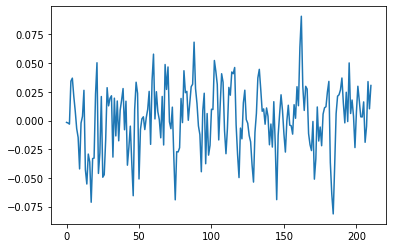

In [55]:
plt.plot(np.mean(err, axis = 0))

In [36]:
td.score(X, y=Y)

NameError: name 'td' is not defined

In [35]:
preds = td.predict(X = X)

NameError: name 'td' is not defined

In [143]:
np.rad2deg(preds).shape

(760, 211)

In [144]:
Y

array([2.74889357, 0.        , 2.35619449, 2.74889357, 0.        ,
       1.57079633, 0.39269908, 0.        , 0.39269908, 1.17809725,
       1.17809725, 1.17809725, 1.17809725, 1.96349541, 2.35619449,
       0.        , 0.78539816, 1.17809725, 1.96349541, 0.39269908,
       2.74889357, 0.78539816, 1.96349541, 0.39269908, 0.        ,
       2.74889357, 1.57079633, 1.96349541, 0.        , 1.17809725,
       1.17809725, 2.35619449, 1.96349541, 0.78539816, 2.35619449,
       2.35619449, 2.35619449, 0.        , 1.96349541, 1.57079633,
       1.57079633, 0.39269908, 2.74889357, 1.57079633, 1.17809725,
       2.74889357, 1.57079633, 0.        , 2.35619449, 0.39269908,
       0.39269908, 1.57079633, 0.78539816, 1.57079633, 1.57079633,
       1.96349541, 0.        , 1.17809725, 1.96349541, 2.35619449,
       1.96349541, 1.17809725, 1.57079633, 0.78539816, 2.74889357,
       0.78539816, 2.74889357, 0.78539816, 0.78539816, 2.35619449,
       2.35619449, 0.78539816, 0.39269908, 2.35619449, 0.     

In [35]:
 np.corrcoef(Y,preds[:,100])[0,1]

NameError: name 'preds' is not defined

In [167]:
R = np.array([])

In [34]:
preds

NameError: name 'preds' is not defined

In [173]:
scorer_angle(Y,preds[:,col])

1.0204961426392614

In [36]:
plt.plot(scorer_angle(Y,preds)-1)

NameError: name 'preds' is not defined

In [ ]:
def _check_y(y_true, y_pred):
    """Aux function to apply scorer across multiple dimensions."""
    # Reshape to get 2D
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    assert_true(len(y_pred) == len(y_pred))
    shape = y_pred.shape
    y_pred = np.reshape(y_pred, [shape[0], -1])
    y_true = np.squeeze(y_true)
    assert_true(y_true.ndim == 1)
    # remove nan values XXX non-adjacency need memory!
    if np.any(np.isnan(y_true)) or np.any(np.isnan(y_pred)):
        sel = np.where(~np.isnan(y_true[:, np.newaxis] + y_pred))[0]
        y_true = y_true[sel]
        y_pred = y_pred[sel, :]
    return y_true, y_pred, shape

def _parallel_scorer(y_true, y_pred, func, n_jobs=1):
    from nose.tools import assert_true
    from mne.parallel import parallel_func, check_n_jobs
    # check dimensionality
    assert_true(y_true.ndim == 1)
    assert_true(y_pred.ndim == 2)
    # set jobs not > to n_chunk
    n_jobs = min(y_pred.shape[1], check_n_jobs(n_jobs))
    parallel, p_func, n_jobs = parallel_func(func, n_jobs)
    chunks = np.array_split(y_pred.transpose(), n_jobs)
    # run parallel
    out = parallel(p_func(chunk.T, y_true) for chunk in chunks)
    # gather data
    return np.concatenate(out, axis=0)


def scorer_angle(y_true, y_pred, n_jobs=1):
    """Scoring function dedicated to AngularRegressor"""
    y_true, y_pred, shape = _check_y(y_true, y_pred)
    accuracy = _parallel_scorer(y_true, y_pred, _angle_accuracy, n_jobs)
    if (len(shape) > 1) and (np.sum(shape[1:]) > 1):
        accuracy = np.reshape(accuracy, shape[1:])
    else:
        accuracy = accuracy[0]
    return accuracy


def _angle_accuracy(y_pred, y_true):  # XXX note reversal of y_true & y_pred
    angle_error = y_true[:, np.newaxis] - y_pred
    score = np.mean(np.abs((angle_error + np.pi) % (2 * np.pi) - np.pi),
                    axis=0)
    return np.pi / 2 - score

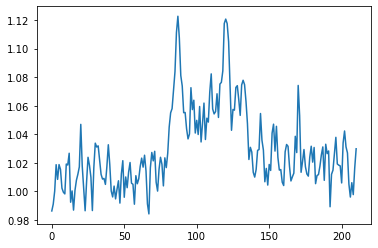

In [56]:
plt.plot(scorer_angle(Y,preds))

In [37]:
R = np.array([])
for col in range(preds.shape[1]):
    R = np.append(R,R_val)

NameError: name 'preds' is not defined

In [185]:
td.score

<bound method SlidingEstimator.score of <SlidingEstimator(base_estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                ('angularregression', AngularRegression(clf=LinearSVR()))]),
         n_jobs=1, scoring=<function scorer_angle at 0x7f9a2099aef0>, fitted with 211 estimators>>

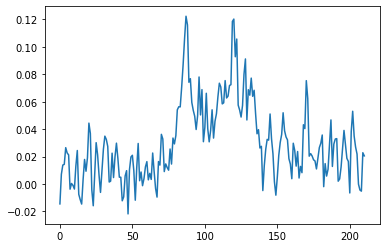

In [177]:
plt.plot(R)

In [145]:
for i in np.range(0,760)
    print(i)

SyntaxError: invalid syntax (3810183882.py, line 1)

In [124]:
60*4/5

48.0

In [120]:
scorer_angle()

TypeError: scorer_angle() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [116]:
preds.shape

(760, 211)

In [122]:
np.rad2deg(preds)

array([[  42.85065189,   39.91441692,  -77.79504565, ...,  -20.40300917,
         -44.08947557,  -57.41723134],
       [  29.05278414,   11.42740735,    5.87229298, ...,  -96.5407536 ,
          14.84215603,   75.69212339],
       [  -7.65707702,  -16.54488895, -159.87694988, ...,  -91.6471407 ,
         -60.74211829,  -97.5266647 ],
       ...,
       [   6.09244753,  -51.04984565,  -15.66700888, ...,   57.58403176,
          24.31958012,   10.80545825],
       [ -24.13673591,   44.96281393,   32.57563907, ...,   38.49615496,
          17.49664117,   19.28901272],
       [   2.19252334,  -19.07374926,   -2.71690556, ...,  -11.19091062,
          32.46044491,   54.18956124]])

In [190]:
td.fit(X = X, y = Y)

  0%|          | Fitting SlidingEstimator : 0/211 [00:00<?,       ?it/s]

/Users/alex/opt/anaconda3/envs/mne/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/alex/opt/anaconda3/envs/mne/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/alex/opt/anaconda3/envs/mne/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/alex/opt/anaconda3/envs/mne/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/alex/opt/anaconda3/envs/mne/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/alex/opt

<SlidingEstimator(base_estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                ('angularregression', AngularRegression(clf=LinearSVR()))]),
         n_jobs=1, scoring=None, fitted with 211 estimators>

In [ ]:
t

In [139]:
td.score(X = X, y = Y)


TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [138]:
plt.plot(td.score(X=X, y=Y))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [105]:
Y

array([7., 0., 6., 7., 0., 4., 1., 0., 1., 3., 3., 3., 3., 5., 6., 0., 2.,
       3., 5., 1., 7., 2., 5., 1., 0., 7., 4., 5., 0., 3., 3., 6., 5., 2.,
       6., 6., 6., 0., 5., 4., 4., 1., 7., 4., 3., 7., 4., 0., 6., 1., 1.,
       4., 2., 4., 4., 5., 0., 3., 5., 6., 5., 3., 4., 2., 7., 2., 7., 2.,
       2., 6., 6., 2., 1., 6., 0., 2., 1., 7., 1., 0., 6., 7., 0., 7., 7.,
       5., 1., 2., 5., 4., 4., 1., 3., 2., 6., 5., 1., 4., 7., 4., 7., 0.,
       5., 1., 4., 2., 5., 0., 6., 2., 0., 0., 0., 7., 6., 5., 5., 2., 3.,
       5., 2., 2., 0., 5., 2., 3., 1., 3., 1., 6., 4., 4., 0., 3., 2., 2.,
       6., 3., 2., 7., 7., 0., 5., 4., 6., 1., 4., 7., 6., 7., 0., 0., 7.,
       3., 2., 7., 5., 2., 3., 7., 2., 1., 5., 0., 1., 5., 1., 7., 6., 7.,
       3., 6., 3., 3., 3., 1., 0., 4., 4., 5., 1., 4., 6., 4., 4., 1., 6.,
       6., 0., 4., 0., 4., 7., 7., 3., 6., 5., 5., 3., 2., 1., 1., 3., 5.,
       6., 4., 4., 1., 1., 2., 5., 3., 0., 2., 4., 4., 6., 6., 5., 6., 7.,
       3., 7., 3., 0., 1.

In [96]:

# Plot the scores
td.plot(chance=0.)

AttributeError: 'SlidingEstimator' object has no attribute 'plot'

In [ ]:
# Let's use a double regressor to estimate the angle from the sine and cosine
# See `method_model_types.ipynb` to see understand how this is built.

#/!\ On the server, there's only one core, so be patient!

clf_angle = make_pipeline(StandardScaler(), AngularRegression(clf=LinearSVR()))
td = TimeDecoding(clf=clf_angle, scorer=scorer_angle, n_jobs=-1)

# Define regressor
y = np.array(events['probe_circAngle'].values)

# This can take a while, so let's only decode around probe onset
epochs_probe = epochs.crop(.700, copy=True)

# Fit models with cross validation
td.fit(epochs_probe, y=y)

# Predict orientation and score the difference between true and predicted
# orientations
td.score(epochs_probe, y=y)

# Plot the scores
td.plot(chance=0.)
plt.show()

In [32]:
R2.shape

(273, 211)

In [20]:
n_trial, n_chan, n_time = X.shape

In [9]:
n_trial

273

In [26]:
corr_linear_circular

NameError: name 'corr_linear_circular' is not defined

ImportError: attempted relative import with no known parent package

In [1]:
import base_stats

In [ ]:
base_stats.cor

In [3]:
corr_linear_circular

<function base_stats.corr_linear_circular(X, alpha)>

In [25]:
from helper_funs import corr_linear_circular

ImportError: cannot import name 'corr_linear_circular' from 'helper_funs' (/Users/alex/Library/CloudStorage/OneDrive-UniversitatdeBarcelona/Projects/Condcision/Group_level_analyses/Beh_analyses/EEG_condcision_CJ/helper_funs.py)

In [19]:
y = np.rad2deg(ori_data['X'])

In [20]:
X = ori_data['Y']

In [21]:
np.shape(X)

(273, 211, 760)

In [22]:
corr_linear_circular

NameError: name 'corr_linear_circular' is not defined

In [ ]:
# define the regressor: here the probe angle
y = np.array(events['probe_circAngle'].values)
X = epochs._data

# We need a 2D X (trials x dimension)
n_trial, n_chan, n_time = epochs._data.shape
X = X.reshape([-1, n_chan * n_time])

# linear circular correlation between MEG and stim angle
_, R2, _ = corr_linear_circular(X, y)

# plot the effect size using MNE
R2 = R2.reshape([n_chan, n_time])
evoked.data = R2
evoked.plot_joint()

In [16]:
np.shape(ori_data['Y'])

(273, 211, 760)